# Network analysis of Toronto Raptors player passes
As a Canadian I felt committed to cheering on the Toronto Raptors during the NBA finals. To further show my national pride, I decided to do a network analysis of passes made by players on the Toronto Raptors during the NBA finals against the Golden State Warriors. To do this, I needed to gather data on all the games played from the NBA API, but guess what? The NBA doesn't have an official API. Thanks to [Swar Patel](https://github.com/swar), there is an unofficial API [here](https://github.com/swar/nba_api).

## Data
The unofficial NBA API is very easy to use. The documentation is straight forward and there are also some examples provided. I discovered that it pulls data directly from https://stats.nba.com through repeated requests. The NBA stats page looks like this for [Kawhi Leonard](https://stats.nba.com/player/202695/passes-dash/?Season=2018-19&SeasonType=Playoffs&OpponentTeamID=1610612744&PerMode=Totals):

<img src="nba_stats_example.PNG" width="1000">

The steps I completed to get the data in its final CSV form for analysis are as follows:

1. Get team IDs for Raptors and Golden State
2. Get all the players on Raptors
3. For each player, get their passes received and passes made
4. Create dataframe with all passes

## Network Analysis
What the heck is it? I don't really know since I am in the process of learning about network analysis. However, I do know that it involves making these types of charts:

<img src="network_diagram_example.png" width="500">

In all seriousness, though, network analysis could be as simple as producing the graph above in order to show the relationships between individual actors. It could also be as complicated as applying complex algorithms to these relationships and actors to measure various characteristics of networks. For now, I will keep it simple and plot the relationships (passes) between Toronto Raptors players (actors).

## Toronto Raptors network of passes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [7]:
passes_received = pd.read_csv('tor_passes_received.csv')[['PLAYER_NAME_LAST_FIRST', 'PASS_FROM', 'PASS']]

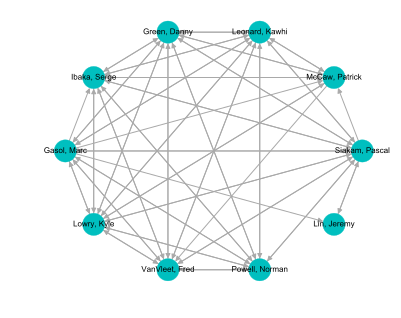

In [12]:
import networkx as nx

G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST', create_using=nx.DiGraph())
pos = nx.circular_layout(G)
edges = G.edges()
plt.figure(3,figsize=(5,4)) 
nx.draw(G, pos, edges=edges, node_color='c', edge_color='darkgrey', node_size=500)
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

In [ ]:
# do weights 
# # USES PANDAS
# https://stackoverflow.com/questions/52400380/assign-edge-weights-to-a-networkx-graph-using-pandas-dataframe
# # OTHER
# https://qxf2.com/blog/drawing-weighted-graphs-with-networkx/
# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html